<a href="https://colab.research.google.com/github/JDS289/DNNs/blob/main/renameEventuallyB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Info


Welcome to the first assignment for the Deep Learning and Neural Networks (DeepNN) module. This first half is marked out of 30, and makes up 30% of the total marks you can earn in this module. The second assignment is going to be a bit more substantial and more open-ended.


There are 3 parts to this assignment, A, B and C, each worth 10% of the total module marks. The first two exercises contain specific subtasks, while the final one is more open-ended, requires you to do a bit of independent reading and experimentation.

How to submit:
* Please run this notebook in [google colab](https://colab.research.google.com/), adding your own code and text cells as requested
* Leave relevant output (plots, etc) in the colab - assume we won't be running your code, but we want to check how you solved problems. Please name and submit the `ipynb` file.
* For each of the three sections (A, B and C), please submit a 1 page pdf with:
   * Up to 350 words of text summarising and interpreting of your findings.
   * Up to 2 figures (or tables)
   * For mathematical derivations, for which an extra appendix page is allowed. It's fine to include a screenshot of compiled latex or photo of hand written notes - if that saves you time.
* For Sections A and B we included a writeup checklist to help you remember to include important components.
* You do not have to max out the word count of figure numbers, in fact we prefer short, to the point, descriptions.
* A correct solution of what we asked for with a solid writeup will earn full marks. Going beyond the brief - great, do it if you're curious - won't earn extra marks.

Part of the goal of this assignment is for you to familiarise yourself with `pytorch`, if you don't know it already. To this end we tried to include quite a bit of explanation, skeleton code, and some hints.

# B: Sawtooth network




This part of the assignment looks at the *sawtooth* network Ferenc showed in the second lecture to demonstrate that deep ReLU networks can represent exponentially complex piecewise linear functions. The function is defined by the following recursion:

\begin{align}
f_l(x) &= 2\cdot \vert f_{l-1}(x)\vert - 2\\
f_0(x) &= x
\end{align}

This function can be implemented as a deep, narrow neural network with just two ReLU units at each layer. Below, I provide a simple `pytorch` implementation. The network has three different layers in it: the input layer, the middle layers, which are repeated, and the output layer. ReLU nonlinearities are sandwiched between them.

In [ ]:
import torch
from torch.nn import Identity, Sequential, Linear, ReLU
from matplotlib import pyplot as plt


def sawtooth_input_layer():
  '''Input layer of a Sawtooth network. A Linear layer with fixed weights.'''
  layer = Linear(1, 2, bias=False)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[1], [-1]])
  return layer

def sawtooth_middle_layer():
  '''Middle layer of a Sawtooth network. A Linear layer with fixed weights.'''
  layer = Linear(2, 2)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[2, 2], [-2, -2]])
    layer.bias.data = torch.Tensor([-2, 2])
  return layer

def sawtooth_output_layer():
  '''Output layer of a Sawtooth network. A Linear layer with fixed weights.'''
  layer = Linear(2, 1)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[2, 2]])
    layer.bias.data = torch.Tensor([-2])
  return layer

def get_sawtooth_network(num_hidden_layers = 5, middle_layer = sawtooth_middle_layer):
  '''Returns a nn.Sequential model with ReLU activations and weights fixed to
  implement the sawtooth function.

  Parameters
  ----------
  num_hidden_layers : int
    Specifies the number of hidden layers. When 0, the Identity is returned.
  middle_layer: function
    Function to use to construct the layers in the middle. Default is to use
    `sawtooth_middle_layer`.
  '''
  blocks = []
  if num_hidden_layers < 0:
    raise ValueError('Number of hidden layers must be non-negative')
  elif num_hidden_layers == 0:
    blocks = [Identity]
  else:
    for l in range(num_hidden_layers):
      if l==0:
        blocks.append(sawtooth_input_layer())
      else:
        blocks.append(middle_layer())
      blocks.append(ReLU())
    blocks.append(sawtooth_output_layer())
  return Sequential(*blocks)

Let's look at the output of this neural network on a grid of input points:

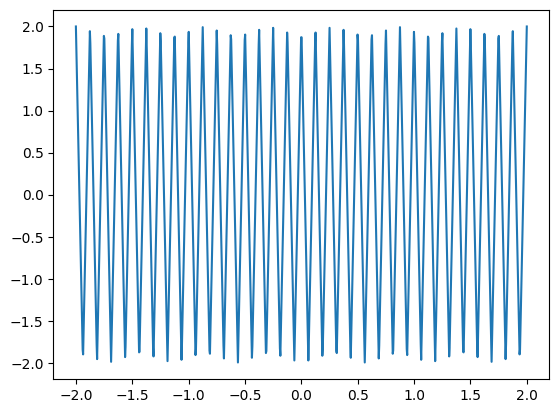

In [43]:
x = torch.linspace(-2,2,1000)[:, None]

model = get_sawtooth_network(6)

plt.plot(x, model(x).detach());

The sawtooth network was deliberately constructed to show that exponentially complex networks can be represented by even very simple deep network architectures like this. But are these complex outputs typical? How easy is it to break this exponential complexity property of the sawtooth networks? The assignment question below asks you to explore this a bit.

## Question B.1 Stripping the Saw's Teeth


I implemented `get_sawtooth_network` in such a way that it is possible to pass a custom functions for constructing the *middle* layers of the network. Create two new versions of this middle layer constructor in the code blocks below:
1. `noisy_sawtooth_middle_layer` should initialize the weights with a bit of random perturbation around the original fixed weights of the sawtooth network. The magnitude of the perturbation is controlled by an argument `noise_level`
2. `random_init_middle_layer` should initialize the weights completely randomly.
Create new models using these randomized layers and plot the model's output like above. I have included code blocks for plotting for convenience. Describe what you find. Is the number of linear segments still exponential?

Finally try reinitializing the whole model weights using standard initialization scheme. *Tip:* Use the `reset_parameters` function on each `Linear` layer in the model.

Please add a summary to the text cell below.

### Answer B.1

Please complete the code cells below and add your interpretation to the text cell provided.

In [ ]:
# Modify the function below so it returns a layer with randomly perturbed
# weights and biases

def noisy_sawtooth_middle_layer(noise_level = 0.1):
  '''A noisy middle layer of a Sawtooth network. A 2x2 linear layer whose weights
  are randomly perturbed around the fixed weights of the sawtooth network.

  Parameters
  ----------
  noise_level : float
    Controls the amount of noise added.
  '''
  layer = Linear(2, 2)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[2, 2], [-2, -2]]) + torch.empty(2, 2).normal_(0, noise_level)  # Gaussian noise with
    layer.bias.data = torch.Tensor([-2, 2]) + torch.empty(2).normal_(0, noise_level)                  # StdDev = noise_level
  return layer

In [ ]:
# Modify the function below so it returns a layer with randomly initialized
# weights and biases.

def random_init_middle_layer():
  '''A randomly initialized 2x2 linear layer.'''
  return Linear(2, 2)   # This randomises with Uniform(-1/sqrt(2),  1/sqrt(2))

def gaussian_init_middle_layer():
  '''A randomly initialized 2x2 linear layer. Randomised with a wide Gaussian with zero mean.'''
  layer = Linear(2, 2)
  with torch.no_grad():
    layer.weight.data = torch.empty(2, 2).normal_(0, 10)   # Only Gaussian noise;
    layer.bias.data = torch.empty(2).normal_(0, 10)        # Mean=0, StdDev=10
  return layer

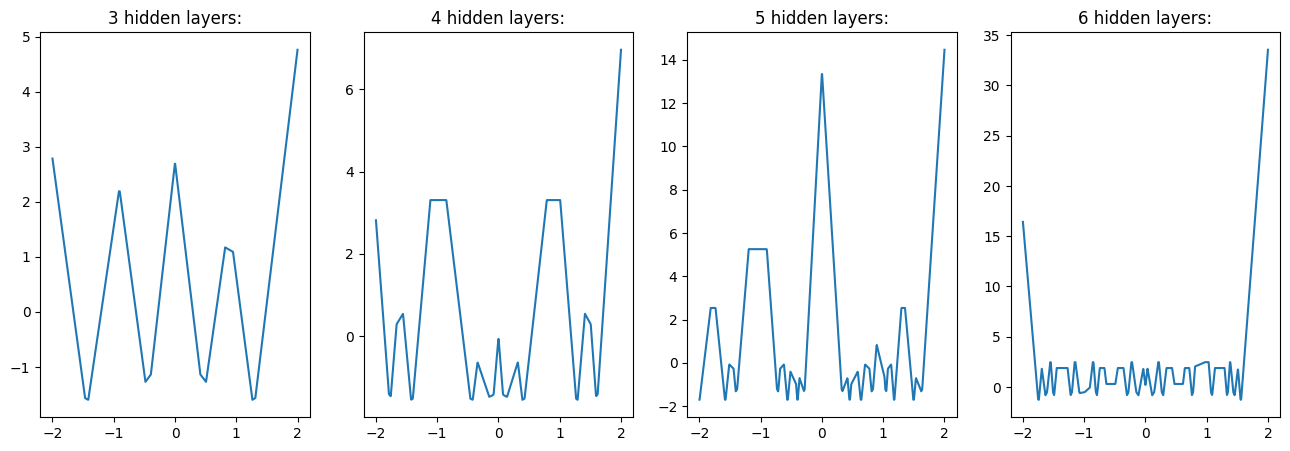

In [44]:
# We added this plotting cell for convenience, you may build on these to
# explore what the functions you implemented do
from functools import partial

models = [get_sawtooth_network(num_hidden_layers=n, middle_layer=partial(noisy_sawtooth_middle_layer, noise_level=0.2)) for n in (3, 4, 5, 6)]

fig, axs = plt.subplots(ncols=4, figsize=(16, 5))

for n, model, ax in zip([3, 4, 5, 6], models, axs):
    ax.plot(x, model(x).detach())
    ax.set_title(f"{n} hidden layers:")

It's not always obvious how many linear segments there are -- sometimes by chance there may be a very short linear segment that's almost unnoticeable. These examples appear to have a similar amount of linear segments as the un-noisy versions (in fact, the noisy 3-hidden-layer result here has more than the un-noisy version, which has 8).


When I double the noise, the amount of linear segments does seem to increase at a slower rate (as below)

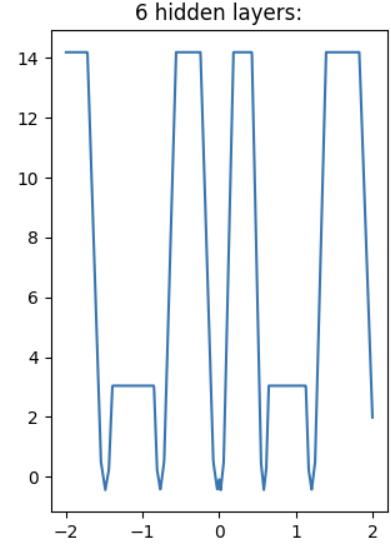

## Question B.2: Shallow Sawtooth Network

Previously, the sawtooth function was implemented with a deep, narrow neural network, now try implementing it with a wide network using only 3 layers. Hint: See Appeindix C here (https://arxiv.org/pdf/1611.03530.pdf).

Repeat the analysis in the previous question and compare the results.


In B.1 each layer (containing 2 RELU units) doubles the amount of "spikes". If we consider the transformation applied by two layers sequentially, perhaps this is equivalent to a transformation that could be done by a single layer containing 4 RELU units?

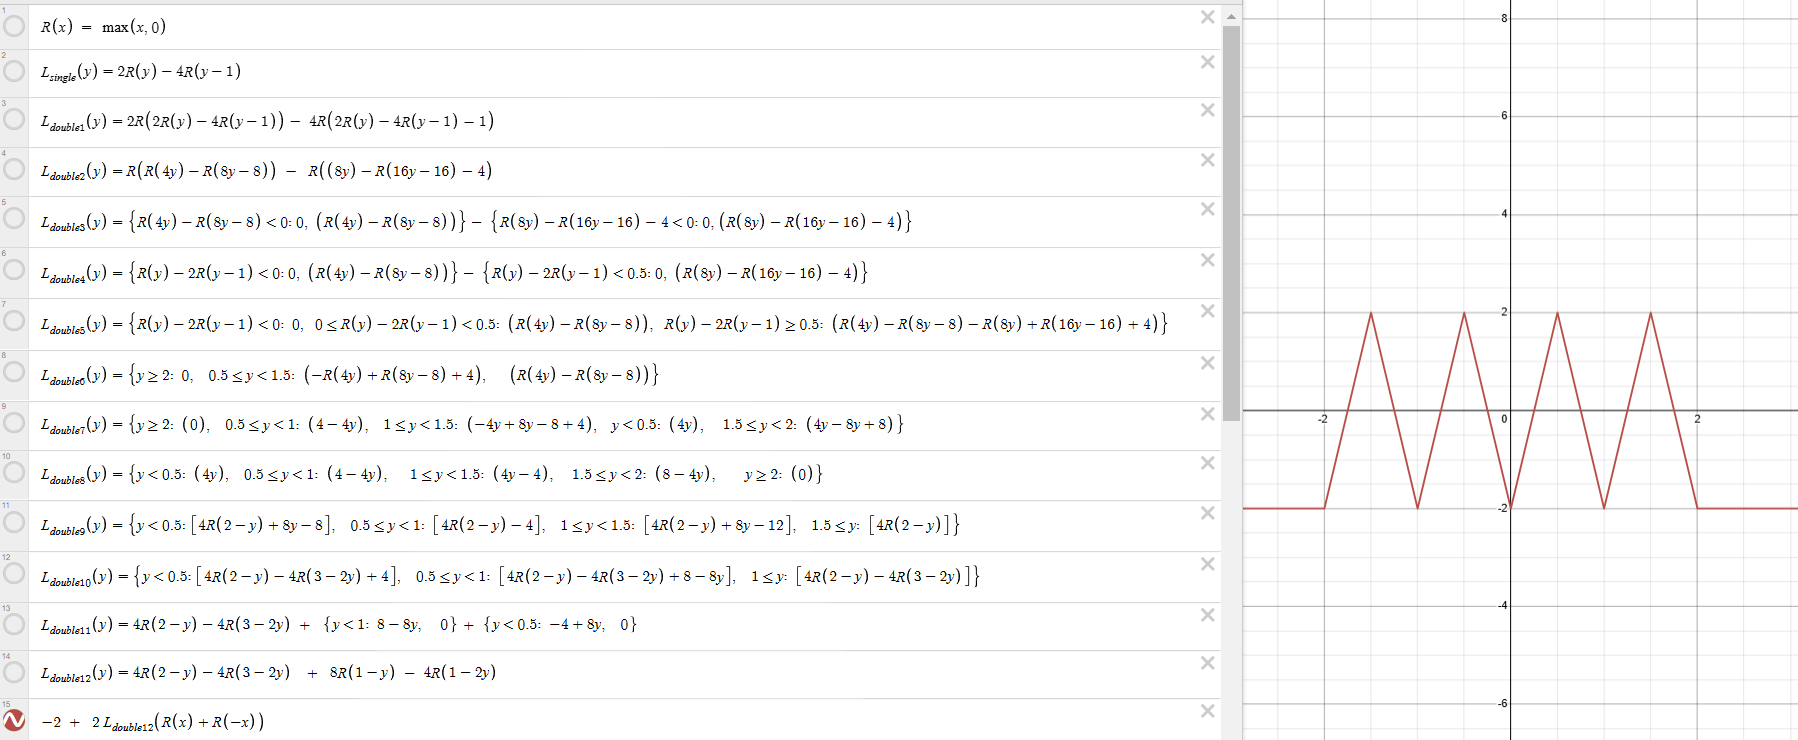

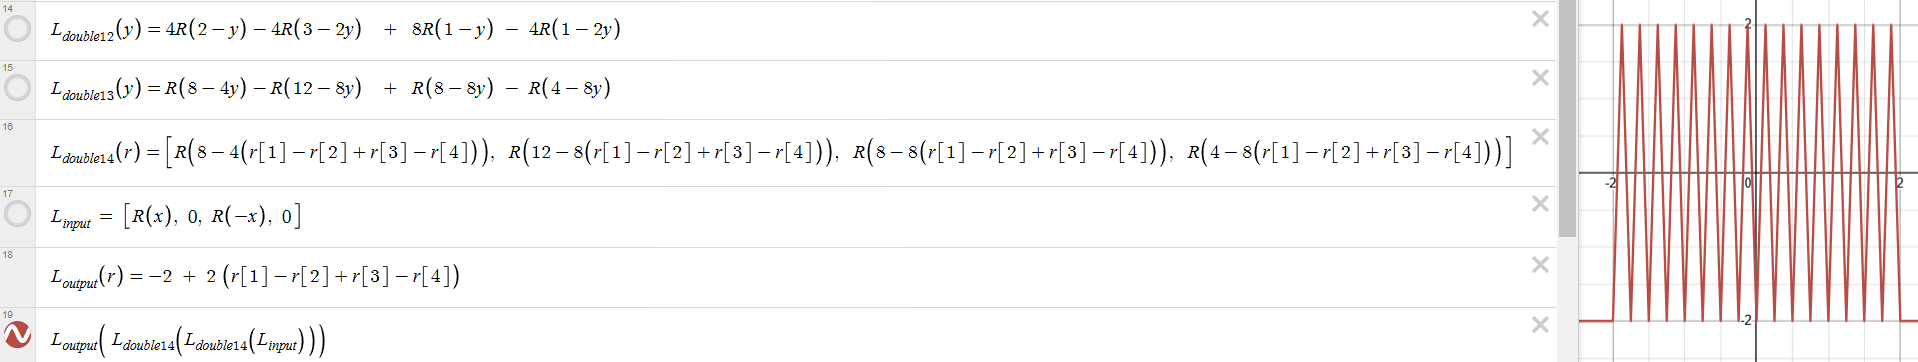

...after lots of maths, I think I have a solution! The idea is to compose 2 layers of a two-RELU_units-per-layer model, obtain a result containing "RELUs inside RELUs", do a case analysis on these to determine things like "when the outer-RELU and inner-RELU both produce non-zero outputs", simplify the RELUs accordingly, and then we get a 4-RELU_unit layer equivalent to 2 sequential layers of the original.

$$\left({L_\text{doubleN} \text{ is line-by-line reasoning, each being a rearrangement/simplification of the last;} \\
\{\text{condition}_1: A,~~~ \text{condition}_2: B, ~~~C\}~~~~ \text{means if-elif-else.}} \right)$$

I think you could continue a method like this, to get a single 16-RELU-unit layer equivalent to two subsequent layers of this model (thus equivalent to *four* subsequent layers of the original model), and so on.

### Answer B.2

Please write your code here.

In [63]:
def sawtooth_input_layer_wide():
  layer = Linear(1, 4, bias=False)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[1], [0], [-1], [0]])
  return layer

def sawtooth_middle_layer_wide():
  layer = Linear(4, 4)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[-4, 4, -4, 4], [-8, 8, -8, 8], [-8, 8, -8, 8], [-8, 8, -8, 8]])
    layer.bias.data = torch.Tensor([8, 12, 8, 4])
  return layer

def noisy_sawtooth_middle_layer_wide(noise_level = 0.4):
  # I've doubled the default noise level, because the (mean) values of the parameters are higher in magnitude than for the thin model
  layer = Linear(4, 4)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[-4, 4, -4, 4], [-8, 8, -8, 8], [-8, 8, -8, 8], [-8, 8, -8, 8]]) + torch.empty(4, 4).normal_(0, noise_level*2)  # Gaussian noise with
    layer.bias.data = torch.Tensor([8, 12, 8, 4]) + torch.empty(4).normal_(0, noise_level*2)                                                          # StdDev = 2*noise_level
  return layer

def sawtooth_output_layer_wide():
  layer = Linear(4, 1)
  with torch.no_grad():
    layer.weight.data = torch.Tensor([[2, -2, 2, -2]])
    layer.bias.data = torch.Tensor([-2])
  return layer


def get_sawtooth_network_wide(num_hidden_layers=3, middle_layer=sawtooth_middle_layer_wide):
  blocks = []
  if num_hidden_layers < 0:
    raise ValueError('Number of hidden layers must be non-negative')
  elif num_hidden_layers == 0:
    blocks = [Identity]
  else:
    for l in range(num_hidden_layers):
      if l==0:
        blocks.append(sawtooth_input_layer_wide())
      else:
        blocks.append(middle_layer())
      blocks.append(ReLU())
    blocks.append(sawtooth_output_layer_wide())
  return Sequential(*blocks)

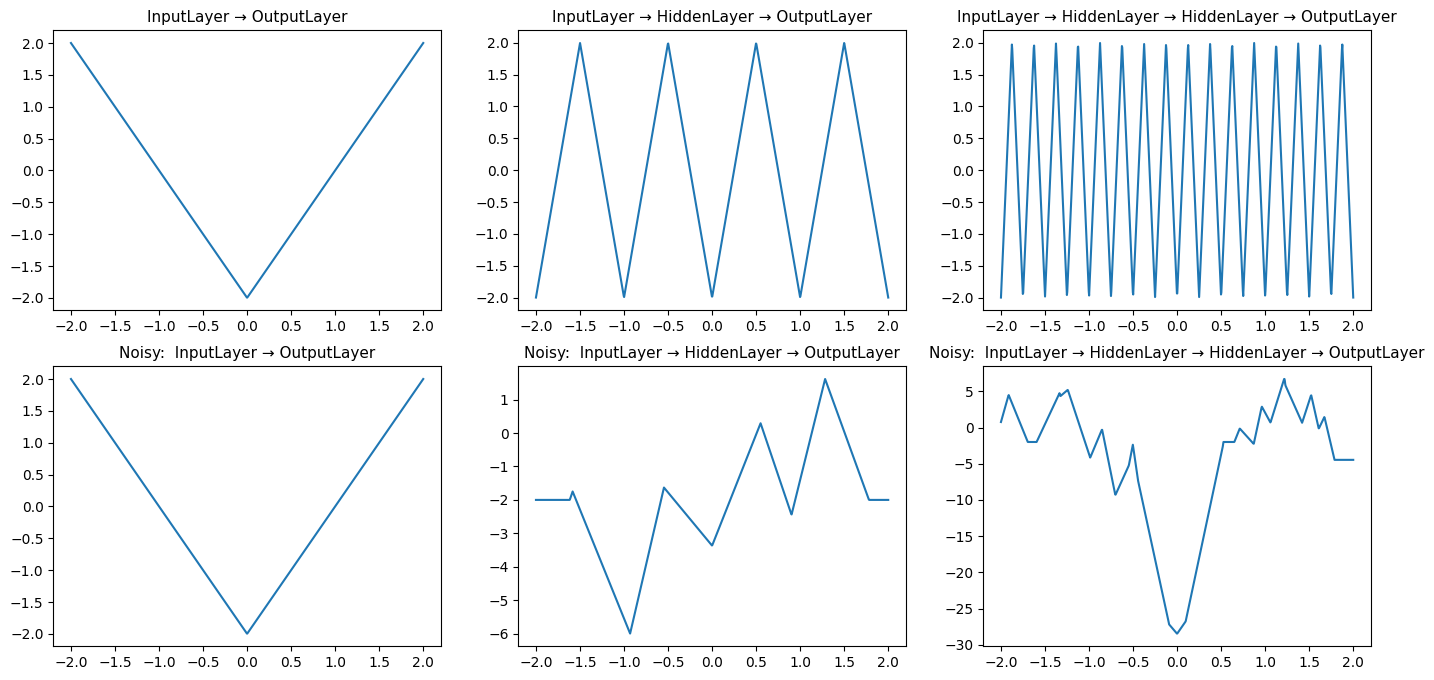

In [81]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17, 8))

x = torch.linspace(-2,2,1000)[:, None]

for i in range(3):
    model = get_sawtooth_network_wide(i+1)
    axs[0][i].plot(x, model(x).detach())
    axs[0][i].set_title(" → ".join(["InputLayer"]+["HiddenLayer"]*i+["OutputLayer"]), fontsize=11)
    noisy_model = get_sawtooth_network_wide(i+1, middle_layer=noisy_sawtooth_middle_layer_wide)
    axs[1][i].plot(x, noisy_model(x).detach())
    axs[1][i].set_title(" → ".join(["Noisy:  InputLayer"]+["HiddenLayer"]*i+["OutputLayer"]), fontsize=11)

Again, seems like noise doesn't have much change on the amount of linear segments -- maybe a small reduction in the growth rate (e.g. the rightmost), but hard to be sure.



### Section B Writeup Checklist

Please compile your findings into a writeup. Please make sure you include:
* 1 figure showing the clean and noisy sawtooth function with deep implementation (may use subfigures so long as it's legible)
* 1 figure showing the clean and noisy shawtooth function with shallow implementation (may use subfigures so long as it's legible)
* summary paragraph describing the experimental setup for the noisy analyses (how you added noise and how much)
* qualitative observations about findings
* comparing deep to shallow implementation
* drawing conclusions beyond the sawtooth example.